# Glass Forensics

**Enter your name here:**

- First Name: Nursinem 
- Last Name: Dere




### Data Set Information:

The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

**Attribute Information (Features)**:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron


**Type of glass: (class attribute)**

- 1 building_windows_float_processed
- 2 building_windows_non_float_processed
- 3 vehicle_windows_float_processed
- 4 vehicle_windows_non_float_processed (none in this database)
- 5 containers
- 6 tableware
- 7 headlamps



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV


In [2]:
Headers = ["RI" , "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
df = pd.read_csv("glass.csv" , sep = "," , names = Headers)

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### (a) Calculate the correlation matrix of the data and plot a heatmap of the correlation matrix
- Calculate the correlation matrix of the data and plot a heatmap of the correlation matrix.
- Which features are correlated most positively (neglect the diagonal)?
- which features are correlated most negatively?

          RI        Na        Mg        Al        Si         K        Ca  \
RI  1.000000 -0.191885 -0.122274 -0.407326 -0.542052 -0.289833  0.810403   
Na -0.191885  1.000000 -0.273732  0.156794 -0.069809 -0.266087 -0.275442   
Mg -0.122274 -0.273732  1.000000 -0.481799 -0.165927  0.005396 -0.443750   
Al -0.407326  0.156794 -0.481799  1.000000 -0.005524  0.325958 -0.259592   
Si -0.542052 -0.069809 -0.165927 -0.005524  1.000000 -0.193331 -0.208732   
K  -0.289833 -0.266087  0.005396  0.325958 -0.193331  1.000000 -0.317836   
Ca  0.810403 -0.275442 -0.443750 -0.259592 -0.208732 -0.317836  1.000000   
Ba -0.000386  0.326603 -0.492262  0.479404 -0.102151 -0.042618 -0.112841   
Fe  0.143010 -0.241346  0.083060 -0.074402 -0.094201 -0.007719  0.124968   

          Ba        Fe  
RI -0.000386  0.143010  
Na  0.326603 -0.241346  
Mg -0.492262  0.083060  
Al  0.479404 -0.074402  
Si -0.102151 -0.094201  
K  -0.042618 -0.007719  
Ca -0.112841  0.124968  
Ba  1.000000 -0.058692  
Fe -0.058692  

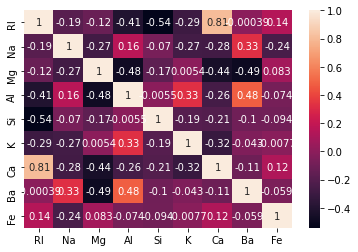

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

features=df.iloc[:,:-1].columns;
corr = df[features].corr()

#enter your code here
print (corr) #correlation matrix
sn.heatmap(corr, annot=True) #heatmap
plt.show()

#RI-Ca, RI-Ba, RI-Fe positively correlated
#Na-Al, Na-Ba, Al-Si positively correlated
#RI-Na, RI-Mg, RI-Al, RI-Si, RI-K negatively correlated
#Mg-Ca, Mg-Ba, Al-Mg negatively correlated
#...


### (b) Class Balance

- Plot a histogram of the target variable, the glass type.
- Are the classes well balanced?
- What is the risk of unbalanced classes and what can be done to improve the situation?


Text(0, 0.5, 'frequency')

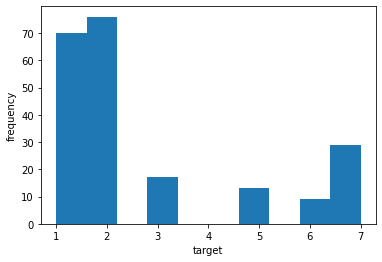

In [8]:
# enter your code here
plt.figure()
plt.hist(df['Type'])
plt.xlabel('target')
plt.ylabel('frequency')
#Not well balanced, we can upsample minorty classes, downsample majority classes, change the performance metric etc.


### (c) Test Train Split
- Split the data in 80% training and 20% test data.


In [10]:

Y = df["Type"].values
Y = Y.astype(float)
X = df.values

# enter your code here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)



### (d) Scaling

- Scale the data using the `StandardScaler()` form `sklearn.preprocessing`.
- Train the `StandardScaler()` on the training data and apply it also to the test data.

In [11]:
from sklearn.preprocessing import StandardScaler

# enter your code here
# Scaler=StandardScaler()

Scaler = StandardScaler()
Xtrain_scale = Scaler.fit_transform(X_train)
Xtest_scale = Scaler.transform(X_test)



### (e) Linear Kernel
- Train a *Support Vector Classifier* (`SVC`) from `sklearn.svm` using a linear kernel with `C=0.1`.
- Print the *classification report* on the test data using `classification_report` from `sklearn.metrics`. 
- Print the *classification accuracy* on the test data.
- Print the *confusion matrix*

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00         6
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Accuracy: 1.000000


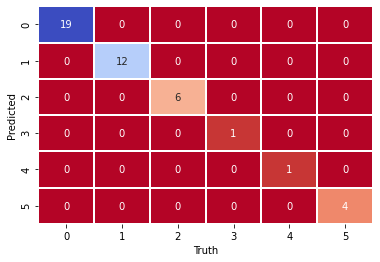

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# enter your code here
# clf1 = SVC(...)

C = 0.1
clf1 = SVC(kernel='linear', C=C)
clf1.fit(X_train, y_train)

y_true, y_pred = y_test, clf1.predict(X_test)
print(classification_report(y_true, y_pred))

print('Accuracy: %f' % accuracy_score(y_test, y_pred))

conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True, fmt='d', cbar=False, cmap="coolwarm_r",  linewidth = 1)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

### (f) Support Vector Classifier (SVC) using Radial Basis function kernel (RBF)
- Train a Support Vector Classifier using a *Radial Basis Function kernel* (`RBF`) with `C=100` and `gamma=0.1`.
- Print the classification on the test data report using `classification_report` from `sklearn.metrics`. 
- Print the classification *accuracy* on the test data.
- Print the *confusion matrix*


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        19
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00         6
         5.0       1.00      1.00      1.00         1
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

Accuracy: 1.000000


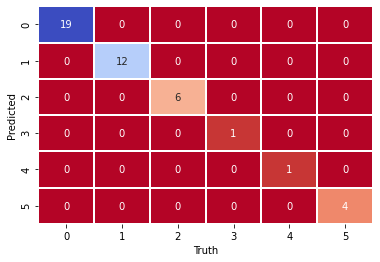

In [23]:
# enter your code here
# clf2 = SVC(...)
clf2 = SVC(kernel='rbf', C=100, gamma=0.1, probability=True)
clf2.fit(X_train, y_train)

y_true, y_pred = y_test, clf2.predict(X_test)
print(classification_report(y_true, y_pred))

print('Accuracy: %f' % accuracy_score(y_test, y_pred))

conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, annot=True, fmt='d', cbar=False, cmap="coolwarm_r",  linewidth = 1)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()


### (g) 5-fold crossvalidated Grid Search
- Perform a 5-fold crossvalidated *grid search* over the parameters `C` and `gamma`. Use `GridSearchCV` form `sklearn.model_selection`
- Vary both parameters logarithmically in seven steps from $10^{-3}$ to $10^{+3}$.
- What are the optimum parameters for `gamma` and `C`?
- What is the *accuracy* of the best classifier on the test data?

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

C_range     = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
param_grid  = dict(gamma=gamma_range, C=C_range)

#enter your code here
# model=...
# cv = StratifiedShuffleSplit(...)
# grid = GridSearchCV(model, param_grid=..., cv=...,n_jobs=-1)
# ...

C_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
param_grid = dict(gamma=gamma_range, C=C_range)

model=SVC()

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(model, param_grid=param_grid, cv=cv,n_jobs=-1)
grid.fit(X_train, y_train)


print("The best parameters are %s" % (grid.best_params_))

y_pred = grid.best_estimator_.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))



The best parameters are {'C': 1000.0, 'gamma': 0.001}
Accuracy: 1.000000


### Plot the confusion matrix of the best estimator

- Print the classification *accuracy* on the test data.
- Print the *confusion matrix*

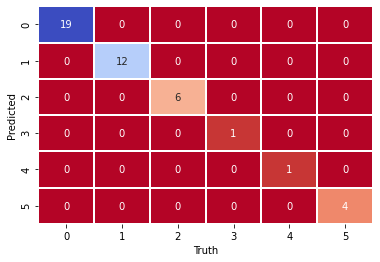

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# enter your code here

y_pred = grid.best_estimator_.predict(X_test)
conf = confusion_matrix(y_pred, y_test)
    # plot
sns.heatmap(conf, annot=True, fmt='d', cbar=False, cmap="coolwarm_r",  linewidth = 1)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()
    


## Upload this notebook as ipynb-File and as html-File (File  →  Download as  →  HTML) to the upload field of this question (2 files are allowed). 